<a href="https://colab.research.google.com/github/LucasGleysson/Senac_ML/blob/master/ML_Projeto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto Final - Curso de Machine Learning SENAC
## Análise e predição de preço de imóveis

Dataset: https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

Este conjunto de dados contém preços de venda de casas, incluindo casas vendidas entre maio de 2014 e maio de 2015.

- *(Mais informações sobre o dataset: https://geodacenter.github.io/data-and-lab//KingCounty-HouseSales2015/)*

##Objetivo

Analisar como os dados estão distribuidos e como eles se comportam em relação ao preço, no fim, tentar prever o preço das casas com base em algumas de suas características.

**Imports**

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1 - Visualização da base

In [63]:
houses = pd.read_csv('/content/drive/MyDrive/kc_house_data.csv')

In [64]:
houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [65]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

- Aparentemente, os dados não tem problemas com valores faltantes ou tipos errados nas colunas, então o foco maior pode ser voltado ao tratamento dos dados em si.

# 2 - Análise Exploratória e Tratamento dos dados

- Primeiro, vou descartar algumas colunas.

In [66]:
houses = houses.drop(columns=['id','zipcode'])

- Id não vai ser muito útil e não precisamos do zipcode se já temos as coordenadas.

###2.1 - Variáveis Categóricas

Vou separar algumas colunas de valor categórico e valores que deveriam ser pequeno para facilitar a análise inicial.

In [67]:
# Selecionando Colunas Categóricas
c_categoricas = houses.copy()
c_categoricas = c_categoricas[['waterfront','view','condition','grade']]
c_categoricas.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
waterfront,21613.0,0.007542,0.086517,0.0,0.0,0.0,0.0,1.0
view,21613.0,0.234303,0.766318,0.0,0.0,0.0,0.0,4.0
condition,21613.0,3.409430,0.650743,1.0,3.0,3.0,4.0,5.0
grade,21613.0,7.656873,1.175459,1.0,7.0,7.0,8.0,13.0


- Os dado categóricos parecem não ter muito problemas, exceto o view.

####View

In [68]:
# Checando porcentagem
(c_categoricas['view'].value_counts() / c_categoricas.shape[0]) * 100

0    90.172581
2     4.455652
3     2.359691
1     1.536113
4     1.475964
Name: view, dtype: float64

- View(vista do imóvel) tem 90% dos seus registros com valor 0,mesmo que as notas de condição e estrutura da casa variem.

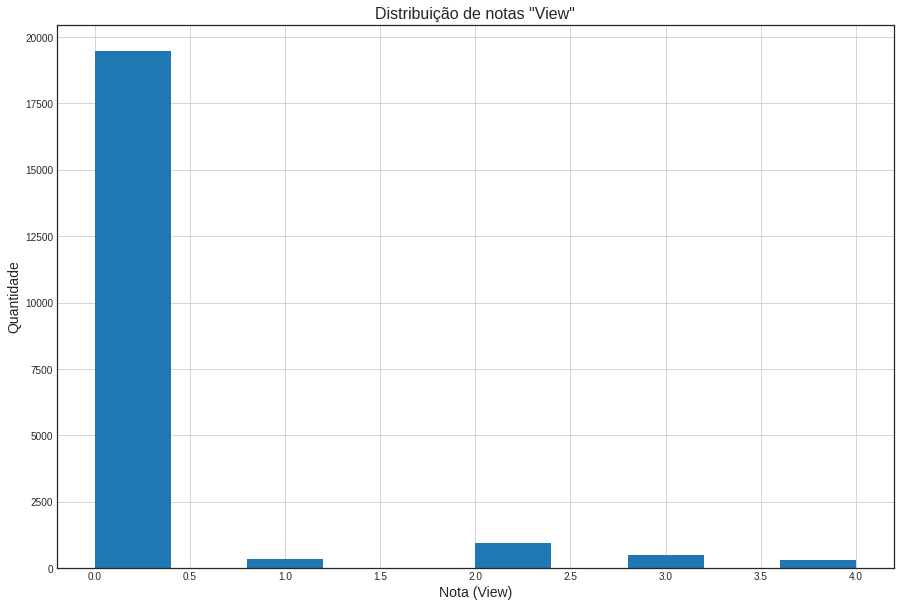

In [69]:
# Visualizando distribuição no gráfico
plt.style.use('seaborn-white')
plt.figure(figsize=(15,10))
plt.hist(c_categoricas['view'])
plt.title('Distribuição de notas "View"', fontsize=16)
plt.xlabel('Nota (View)', fontsize=14)
plt.ylabel('Quantidade', fontsize=14)
plt.grid(True)
plt.show()

- View indica a vista da propriedade basicamente, isso pode indicar que boa parte do terreno pode precisar ser arrumado.

- O crusamento dos dados de view e condition ajudam a ter uma ideia de como pode esta a situação da maioria das casas. 

In [70]:
# Cruzando dados.
pd.crosstab(index=c_categoricas['view'], columns = c_categoricas['condition'])

condition,1,2,3,4,5
view,,,,,
0,27,166,12768,5054,1474
1,1,1,191,105,34
2,0,3,588,268,104
3,0,2,309,153,46
4,2,0,175,99,43


- Mesmo a propriedade não tendo uma boa nota de visualização, a maioria das casas se mantem em condições relativamente boas, com notas iguais e maiores que 3.

####Grade e Condition

- Uma observação interessante de se fazer, é sobre os preços dos imóveis em relação a sua classificação e condição.

-	"Grade - Classificação por qualidade de construção que se refere aos tipos de materiais utilizados e à qualidade da mão-de-obra. Edifícios de melhor qualidade (grau mais alto) custam mais para serem construídos por unidade de medida e exigem maior valor." 

referência: (https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r#b)

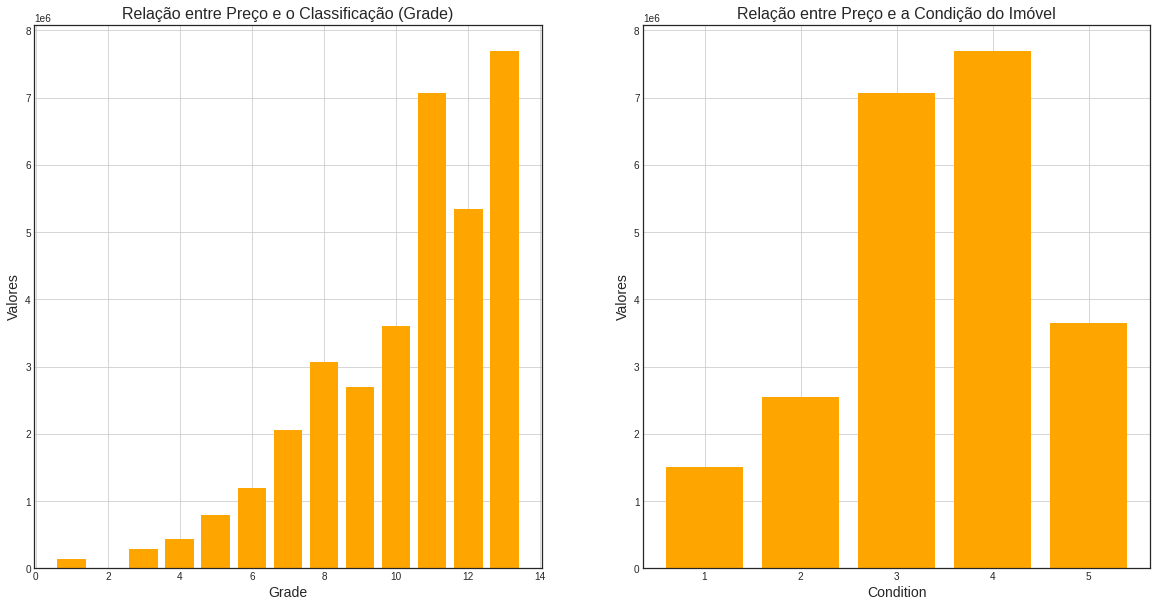

In [71]:
plt.style.use('seaborn-white')
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.bar(c_categoricas['grade'], houses['price'], color='orange')
plt.title('Relação entre Preço e o Classificação (Grade)', fontsize=16)
plt.xlabel('Grade', fontsize=14)
plt.ylabel('Valores', fontsize=14)
plt.grid(True)

plt.subplot(1,2,2)
plt.bar(c_categoricas['condition'], houses['price'], color='orange')
plt.title('Relação entre Preço e a Condição do Imóvel', fontsize=16)
plt.xlabel('Condition', fontsize=14)
plt.ylabel('Valores', fontsize=14)
plt.grid(True)

plt.show()

- E também a forma com que as duas estão relacionadas

In [72]:
# Cruzando dados.
pd.crosstab(index=c_categoricas['grade'], columns = c_categoricas['condition'])

condition,1,2,3,4,5
grade,,,,,
1,1,0,0,0,0
3,0,1,1,0,1
4,1,5,13,10,0
5,9,15,100,84,34
6,11,59,1035,685,248
7,6,75,5234,2833,833
8,2,13,4269,1394,390
9,0,2,2041,446,126
10,0,2,921,156,55


- A maioria dos valores tem grade entre 6 e 9 e condições maiores ou iguais a 3.

###2.2 - Numéricas

Agora é a vez de analisar algumas variáveis numéricas, principalmente que possam estar relacionadas com os preços.

In [73]:
# Selecionando Colunas
c_numericas = houses.copy()
c_numericas = c_numericas[['bathrooms','bedrooms','sqft_living','sqft_lot','yr_built','yr_renovated','sqft_living15','sqft_lot15']]
c_numericas.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bathrooms,21613.0,2.114757,0.770163,0.0,1.75,2.25,2.5,8.0
bedrooms,21613.0,3.370842,0.930062,0.0,3.00,3.00,4.0,33.0
sqft_living,21613.0,2079.899736,918.440897,290.0,1427.00,1910.00,2550.0,13540.0
sqft_lot,21613.0,15106.967566,41420.511515,520.0,5040.00,7618.00,10688.0,1651359.0
yr_built,21613.0,1971.005136,29.373411,1900.0,1951.00,1975.00,1997.0,2015.0
yr_renovated,21613.0,84.402258,401.679240,0.0,0.00,0.00,0.0,2015.0
sqft_living15,21613.0,1986.552492,685.391304,399.0,1490.00,1840.00,2360.0,6210.0
sqft_lot15,21613.0,12768.455652,27304.179631,651.0,5100.00,7620.00,10083.0,871200.0


- Bedrooms pode ter um outlier
- Os valores medianos em sqft_lot e sqft_lot15 estão muitos distantes dos valores da média, além do alto valor do desvio padrão, isso indica a presença de valores muito altos nessas duas colunas.

####Price
- Mas, antes de observar o comportamento dessas variáveis, vamos observar como os preços estãos distribuidos.

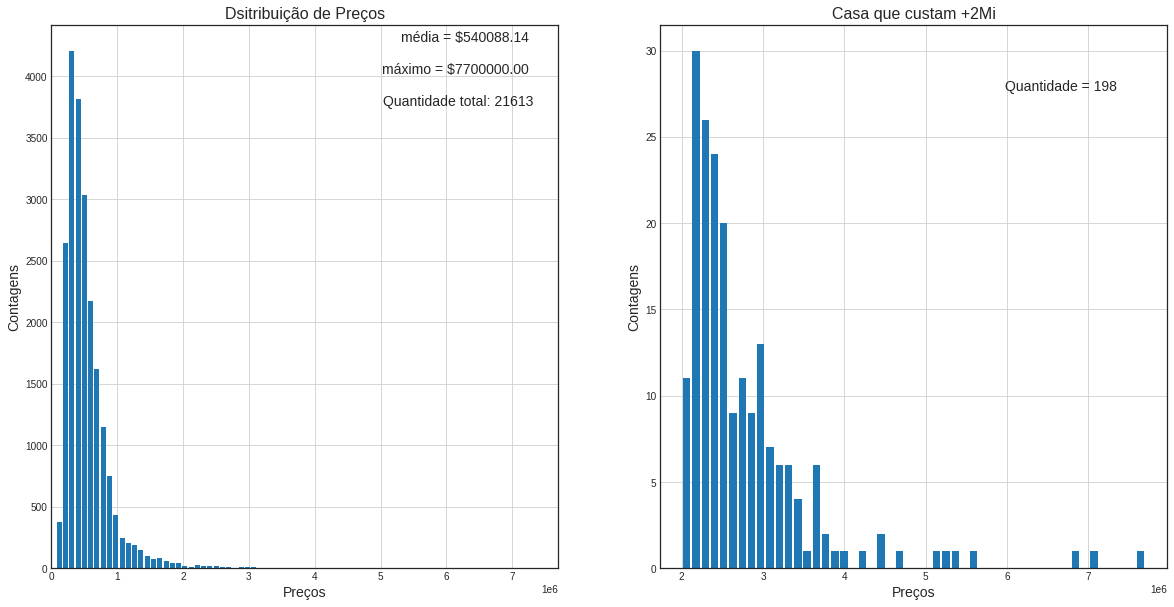

In [74]:
plt.figure(figsize=(20,10))
plt.style.use('seaborn-white')

#################################################################################
# Primeiro Gráfico
plt.subplot(1,2,1)

# Definindo uma pequena legenda primeiro gráfico
text = f'média = ${houses["price"].mean():.2f} \n\nmáximo = ${max(houses["price"]):.2f} \n\nQuantidade total: {houses.shape[0]}'
ax = plt.gca()
plt.text(0.95, 0.99,  text, horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=14)

plt.hist(houses['price'], rwidth=0.8, bins=80)
plt.xlim(-100, max(houses['price'])+5)
plt.title('Dsitribuição de Preços', fontsize=16)
plt.xlabel('Preços', fontsize=14)
plt.ylabel('Contagens', fontsize=14)
plt.grid(True)
#################################################################################
#################################################################################
# Separando valores muito altos.
price_high = houses.loc[houses['price']>2000000]

# Segundo Gráfico
plt.subplot(1,2,2)

# Pequena legenda segundo gráfico
text = f'Quantidade = {price_high["price"].shape[0]}'
ax = plt.gca()
plt.text(0.90, 0.90,  text, horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=14)

plt.hist(price_high['price'], rwidth=0.8, bins=50)
plt.title('Casa que custam +2Mi', fontsize=16)
plt.xlabel('Preços', fontsize=14)
plt.ylabel('Contagens', fontsize=14)
plt.grid(True)
#################################################################################

- Podemos ver que os preços estão muito mal distribuidos e a causa é a existencia de uma quantidade relativamente pequena de valores muito altos.

####Bedrooms

In [75]:
# Lidando com bedrooms demais
houses.loc[houses['bedrooms'] == 33] = 3
houses.loc[houses['bedrooms'] == 33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15


#### Sqft_Lot e Sqft_Living

- Os dados de medida estão em "pés quadrados", então para facilitar, vou converter todos os valores para metro quadrado e manter todas as casas decimais para manter a exatidão do valor.

In [76]:
def converter_sqft(sqft):
  m2 = sqft / 10.764
  return m2

# Convertendo de feet² para metro²
houses['sqft_living'] = houses['sqft_living'].map(converter_sqft)
houses['sqft_living15'] = houses['sqft_living15'].map(converter_sqft)
houses['sqft_lot'] = houses['sqft_lot'].map(converter_sqft)
houses['sqft_lot15'] = houses['sqft_lot15'].map(converter_sqft)
houses['sqft_above'] = houses['sqft_above'].map(converter_sqft)
houses['sqft_basement'] = houses['sqft_basement'].map(converter_sqft)

In [77]:
# Selecionando Colunas
c_numericas = houses.copy()
c_numericas = c_numericas[['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']]
c_numericas.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sqft_living,21613.0,193.220450,85.334840,0.278707,132.385730,177.443330,236.900780,1257.896693
sqft_lot,21613.0,1403.445754,3848.066946,0.278707,468.227425,707.729469,992.939428,153414.994426
sqft_above,21613.0,166.141092,76.938348,0.278707,110.553698,144.927536,205.314010,874.210331
sqft_basement,21613.0,27.079371,41.116225,0.000000,0.000000,0.000000,52.025269,447.788926
sqft_living15,21613.0,184.549526,63.685391,0.278707,138.424378,170.940171,219.249350,576.923077
sqft_lot15,21613.0,1186.198284,2536.627884,0.278707,473.801561,707.915273,936.733556,80936.454849


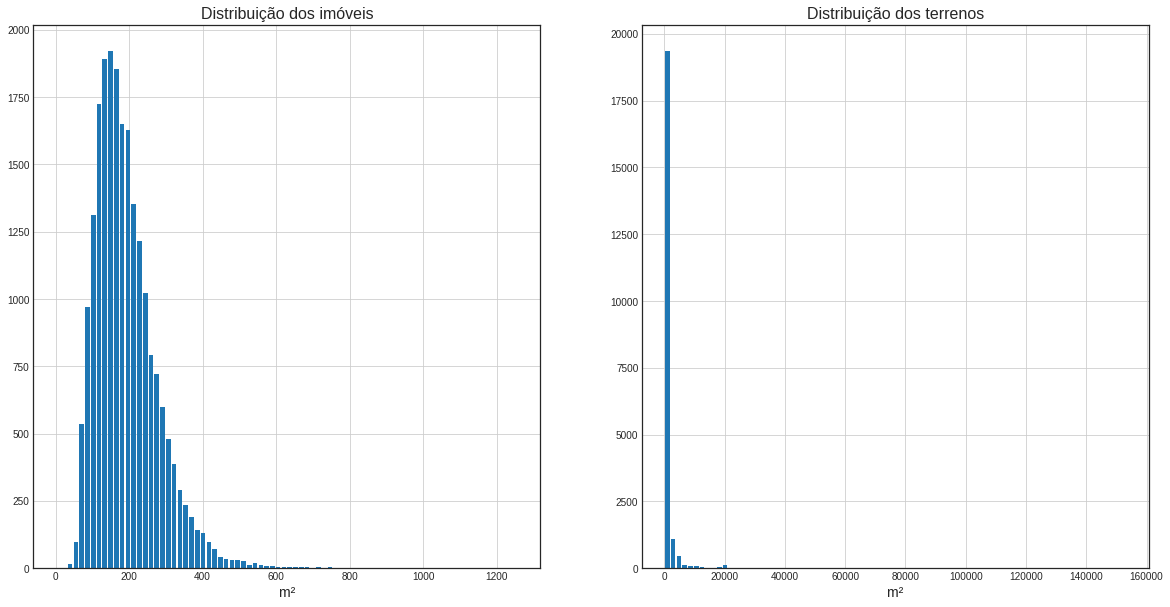

In [78]:
plt.style.use('seaborn-white')
plt.figure(figsize=(20,10))

# Relação do tamanho do terreno com o preço do imóvel
plt.subplot(1,2,1)
plt.hist(houses['sqft_living'], rwidth=0.8, bins=80)
plt.title('Distribuição dos imóveis', fontsize=16)
plt.xlabel('m²', fontsize=14)
plt.grid(True)

# Relação do tamanho do imóvel com o preço

plt.subplot(1,2,2)
plt.hist(houses['sqft_lot'], rwidth=0.8, bins=80)
plt.title('Distribuição dos terrenos', fontsize=16)
plt.xlabel('m²', fontsize=14)
plt.grid(True)

plt.show()



- Além do terreno ter uma distribuição de dados não muito boa, ela tem uma relação estranha com o preço, em comparação com a relação que o tamanho do imóvel tem.

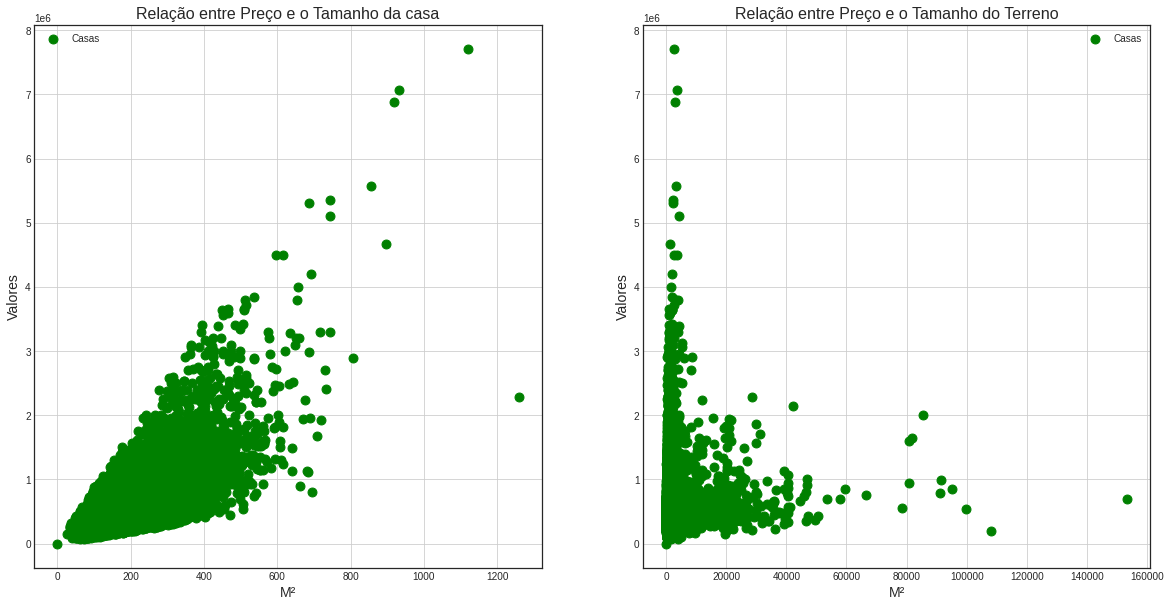

In [79]:
plt.style.use('seaborn-white')
plt.figure(figsize=(20,10))

# Relação do tamanho do imóvel com o preço
plt.subplot(1,2,1)
plt.scatter(houses['sqft_living'],houses['price'], s=80, color='green')
plt.title('Relação entre Preço e o Tamanho da casa', fontsize=16)
plt.xlabel('M²', fontsize=14)
plt.ylabel('Valores', fontsize=14)
plt.legend(['Casas'], loc='upper left')
plt.grid(True)

# Relação do tamanho do terreno com o preço do imóvel
plt.subplot(1,2,2)
plt.scatter(houses['sqft_lot'],houses['price'], s=80, color='green')
plt.title('Relação entre Preço e o Tamanho do Terreno', fontsize=16)
plt.xlabel('M²', fontsize=14)
plt.ylabel('Valores', fontsize=14)
plt.legend(['Casas'], loc='upper right')
plt.grid(True)

plt.show()

- Enquanto o preço aumenta conforme o tamanho da casa aumenta, quando se trata do terreno, observamos que existem casa com terrenos pequenos mas que custam muito, e casa com terrenos enormes mas que são baratas.

- Apesar dos altos valores altos, é dificil definir o que seria um valor errado ou não quando se trata de terreno, principalmente por não ser um ou cinco registros especiais, o que faz crer que esses dados também estão representando uma realidade.

####Yr_Built e Yr_Renovated

In [80]:
# Tratando um valor errado em yr_built
houses.loc[houses['yr_built'] < 1800]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
15870,3,3.0,3,3.0,0.278707,0.278707,3.0,3,3,3,3,0.278707,0.278707,3,3,3.0,3.0,0.278707,0.278707


In [81]:
houses = houses.drop(houses.loc[houses['yr_built'] < 1800].index)
houses.loc[houses['yr_built'] < 1800]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15


- Aqui, podemos observar um pouco sobre quando os imóveis foram construídos e quando foram renovádos.

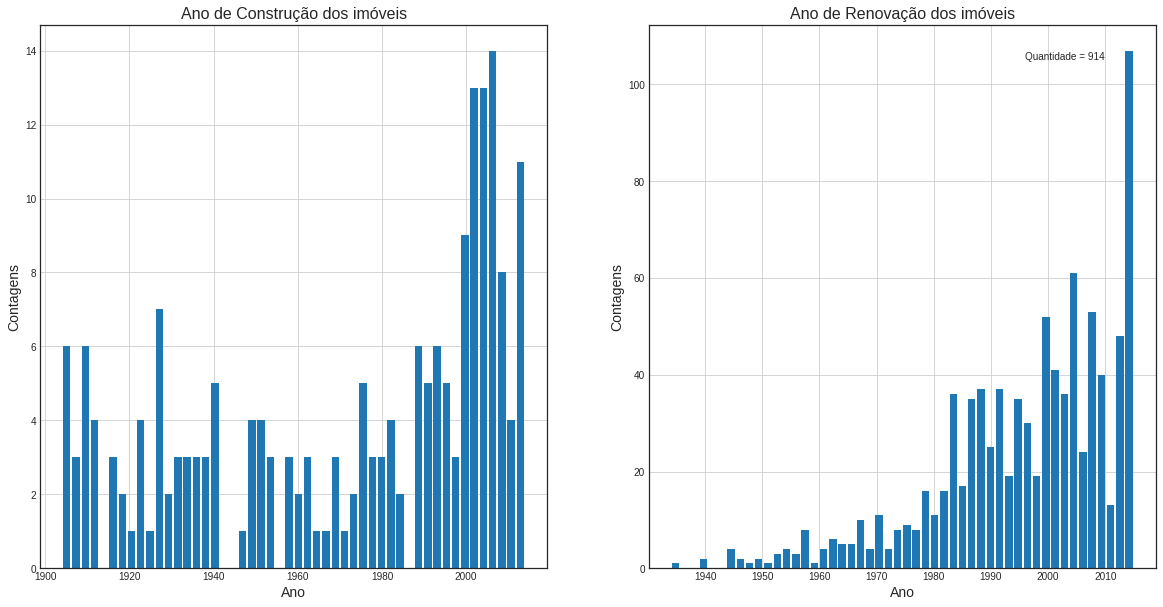

In [82]:
plt.style.use('seaborn-white')
plt.figure(figsize=(20,10))

# Relação do tamanho do terreno com o preço do imóvel
plt.subplot(1,2,1)
plt.hist(price_high['yr_built'], rwidth=0.8, bins=50)
plt.title('Ano de Construção dos imóveis', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Contagens', fontsize=14)
plt.grid(True)

# Relação do tamanho do imóvel com o preço
renovated = houses.loc[houses['yr_renovated'] != 0]

plt.subplot(1,2,2)
text = f'Quantidade = {renovated.shape[0]}'
ax = plt.gca()
plt.text(0.90, 0.95,  text, horizontalalignment='right', verticalalignment='top', transform=ax.transAxes)

plt.hist(renovated['yr_renovated'], rwidth=0.8, bins=50)
plt.title('Ano de Renovação dos imóveis', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Contagens', fontsize=14)
plt.grid(True)

plt.show()

- Mesmo pequeno, se pode ter noção sobre o espaçamento entre as epocas em que as casas foram construidas.

- Uma quantidade bem pequena de casas foram renovadas, mas o gráfico ajuda a observar a epoca em que as renovação mais aconteceram.

- Por fim, podemos observar se existe alguma relação entre o ano de contrução ou renovação da casa e o preço.

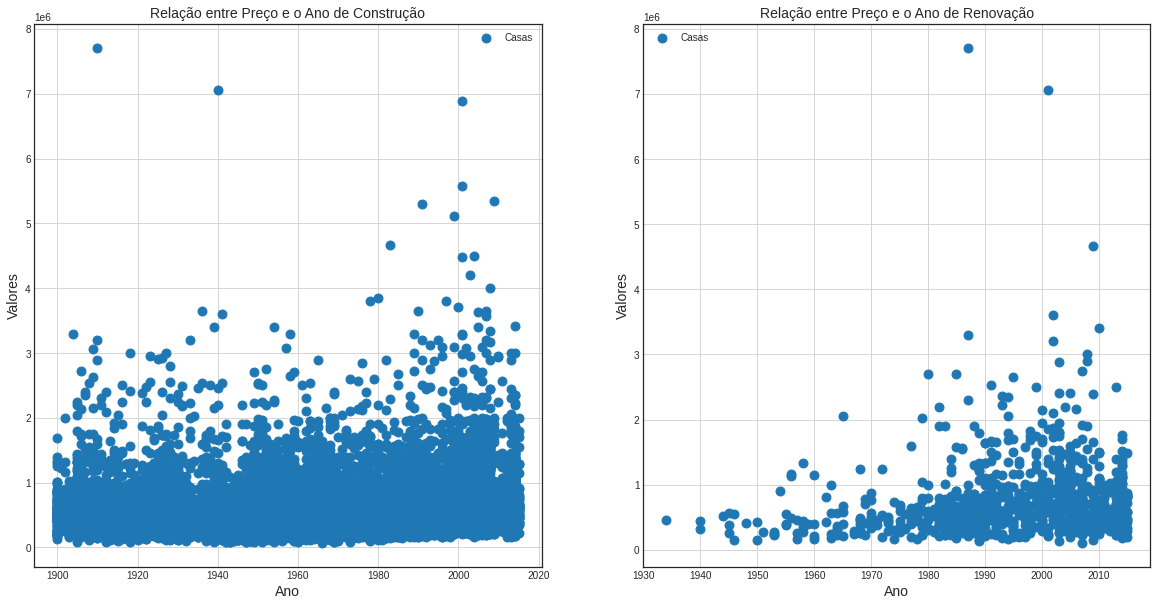

In [83]:
plt.style.use('seaborn-white')
plt.figure(figsize=(20,10))

# Relação entre Preço e o Ano de Construção
plt.subplot(1,2,1)
plt.scatter(houses['yr_built'],houses['price'], s=80)
plt.title('Relação entre Preço e o Ano de Construção', fontsize=14)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Valores', fontsize=14)
plt.legend(['Casas'], loc='upper right')
plt.grid(True)

# Relação entre Preço e o Ano de Renovação
plt.subplot(1,2,2)
plt.scatter(renovated['yr_renovated'],renovated['price'], s=80)
plt.title('Relação entre Preço e o Ano de Renovação', fontsize=14)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Valores', fontsize=14)
plt.legend(['Casas'], loc='upper left')
plt.grid(True)

plt.show()

- Não existe uma tentedência exatamente entre quando a casa foi construída ou renovada com relação ao preço.

##2.3 - Trantando Date.
- Essa formatação é so para facilitar o maniseio com as datas os valores das datas.

In [84]:
houses['date'] = pd.to_datetime(houses['date'])
houses['year'] = houses['date'].dt.year
houses['month'] = houses['date'].dt.month
houses['day'] = houses['date'].dt.day

houses = houses.drop('date', axis=1)

- Desta forma, por exemplo, é possível analisar a em que mês do ano estão foram vendos os imóveis com maiores valores.

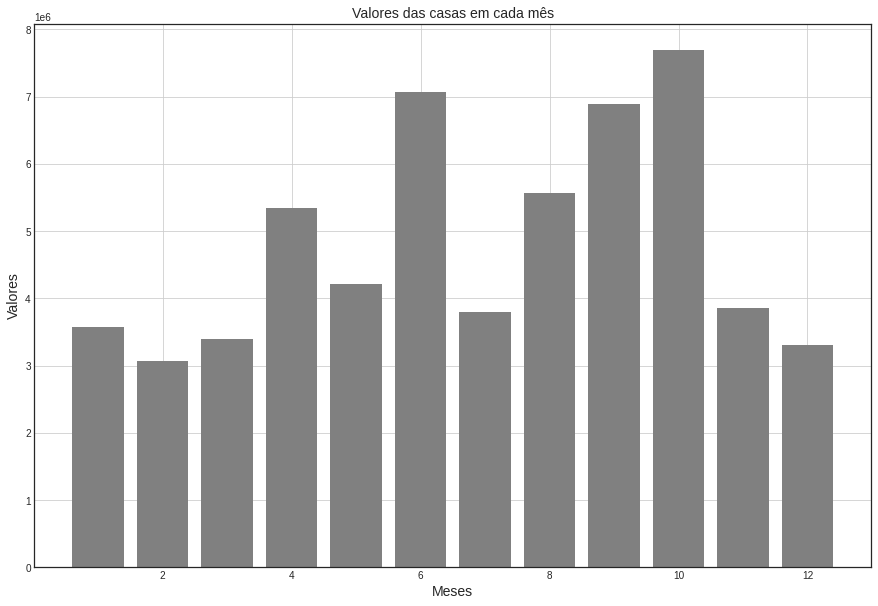

In [85]:
plt.style.use('seaborn-white')
plt.figure(figsize=(15,10))
plt.bar(houses['month'],houses['price'], color='gray')
plt.title('Valores das casas em cada mês', fontsize=14)
plt.xlabel('Meses', fontsize=14)
plt.ylabel('Valores', fontsize=14)

plt.grid(True)

## Conclusões

Os dados não estão muito bem  distribuidos mas em sua maioria, os valores altos demais não são necessáriamente erros, afinal existem imóveis com terrenos enormes, e por não serem valores tão claramente estranhos e fora do padrão, fica difícil decidir o que fica e o que sai.

 Acabei optando por fazer duas coisas, duas regressões diferentes, onde uma será feita com os dados do jeito que estão e a outra será feita com os dados tratados, onde não existirão os valores tão exorbitantes.

# 3- Machine Learning

##3.1 - Sem tratamento

- Primeiro, importamos as bibliotecas que vamos usar.

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

- Então fazemos todas as preparações.

In [87]:
# Definimos a variável alvo e a isolamos.
target = houses['price']
datas = houses.drop(columns='price')

# Definimos as variáveis de treino e teste
x_train, x_test, y_train, y_test = train_test_split(datas, target, random_state=42, shuffle=True)

# Criamos o modelo e fazemos o treinamento
model_LR = LinearRegression()
model_LR.fit(x_train, y_train)

# Visualizamos os coeficientes gerados.
for column, coef in zip(datas.columns, model_LR.coef_):
  print(f'{column}: {coef}')

bedrooms: -37835.71082349497
bathrooms: 47334.13290916692
sqft_living: 1177.6792608466967
sqft_lot: 0.8850353043090428
floors: -49.23060335702908
waterfront: 559507.0185785547
view: 49955.816161529285
condition: 28995.308558655026
grade: 95546.59903646467
sqft_above: 776.9048505318503
sqft_basement: 400.7744103067371
yr_built: -2517.8162067046087
yr_renovated: 24.46719934070362
lat: 556073.349285874
long: -106008.6900900056
sqft_living15: 266.8906642738506
sqft_lot15: -3.521876692599885
year: 36641.6068310928
month: 1354.4055776399498
day: -296.56254958574226


- Encontramos e checamos os coeficientes gerados.

- "Os coeficientes de regressão representam a mudança média na variável resposta para uma unidade de mudança na variável preditora, mantendo as outras preditoras na constante do modelo. Esse controle estatístico que a regressão proporciona é importante porque isola o papel de uma variável de todas as outras no modelo."

- Depois de treinado, partimos para as predições.

In [88]:
# Treino de predição
y_pred_train = model_LR.predict(x_train)

# Predição
y_pred = model_LR.predict(x_test)

###Metricas

In [89]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 126221.24016341944
RMSE: 209945.4465384715
R2 Score: 0.699764764797454


Vamos plotar alguns dados para fazer um teste de predição do valor da casa.
- bedrooms: 3
- bathrooms: 2
- sqft_living:1800
- sqft_lot: 4500
- floors : 2
- waterfront :0
- view: 0
- condition :4
- grade: 8
- sqft_above : 750
- sqft_basement: 900
- yr_built : 1995
- yr_renovated : 0
- lat: 47
- long: -122
- sqft_living15 : 1700
- sqft_lot15 : 6000
- year : 2015
- month : 12
- day : 3

In [90]:
print(converter_sqft(1800))
print(converter_sqft(4500))
print(converter_sqft(750))
print(converter_sqft(900))
print(converter_sqft(1700))
print(converter_sqft(6000))

167.22408026755855
418.06020066889636
69.67670011148273
83.61204013377927
157.9338535860275
557.4136008918618


In [91]:
# Teste de Predição
model_LR.predict([[3,2,167.22408026755855,418.06020066889636,2,0,0,4,8,69.67670011148273,83.61204013377927,1995,0,47,-122,157.9338535860275,557.4136008918618,2015,12,3]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([132512.8084715])

##3.2 - Com o tratamento

Correções: 
- Valores altos de preços
- Valores altos de lots

In [92]:
houses.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,21612.0,540083.518786,367135.061269,75000.000000,321837.500000,450000.000000,645000.000000,7.700000e+06
bedrooms,21612.0,3.369471,0.907982,0.000000,3.000000,3.000000,4.000000,1.100000e+01
bathrooms,21612.0,2.114774,0.770177,0.000000,1.750000,2.250000,2.500000,8.000000e+00
sqft_living,21612.0,193.229377,85.326720,26.941657,132.525084,177.443330,236.900780,1.257897e+03
sqft_lot,21612.0,1403.510679,3848.144138,48.309179,468.227425,707.822371,992.962653,1.534150e+05
floors,21612.0,1.494332,0.539991,1.000000,1.000000,1.500000,2.000000,3.500000e+00
waterfront,21612.0,0.007542,0.086519,0.000000,0.000000,0.000000,0.000000,1.000000e+00
view,21612.0,0.234314,0.766334,0.000000,0.000000,0.000000,0.000000,4.000000e+00
condition,21612.0,3.409356,0.650668,1.000000,3.000000,3.000000,4.000000,5.000000e+00
grade,21612.0,7.656904,1.175477,1.000000,7.000000,7.000000,8.000000,1.300000e+01


In [93]:
# Tratando preços altos
std_price = houses['price'].std() * 3
houses = houses.loc[houses['price'] < std_price]

# Tratando tamanhos de terrenos muito grandes
houses = houses.loc[houses['sqft_lot'] < 2000]
houses = houses.loc[houses['sqft_lot15'] < 3000]
houses = houses.loc[houses['sqft_living'] < 500]
houses = houses.loc[houses['sqft_living15'] < 600]

# Tratando de valores de imóveis maiores que o terreno
houses = houses.drop(index=houses.loc[houses['sqft_lot'] < houses['sqft_living']].index.tolist())
houses.shape

(17684, 21)

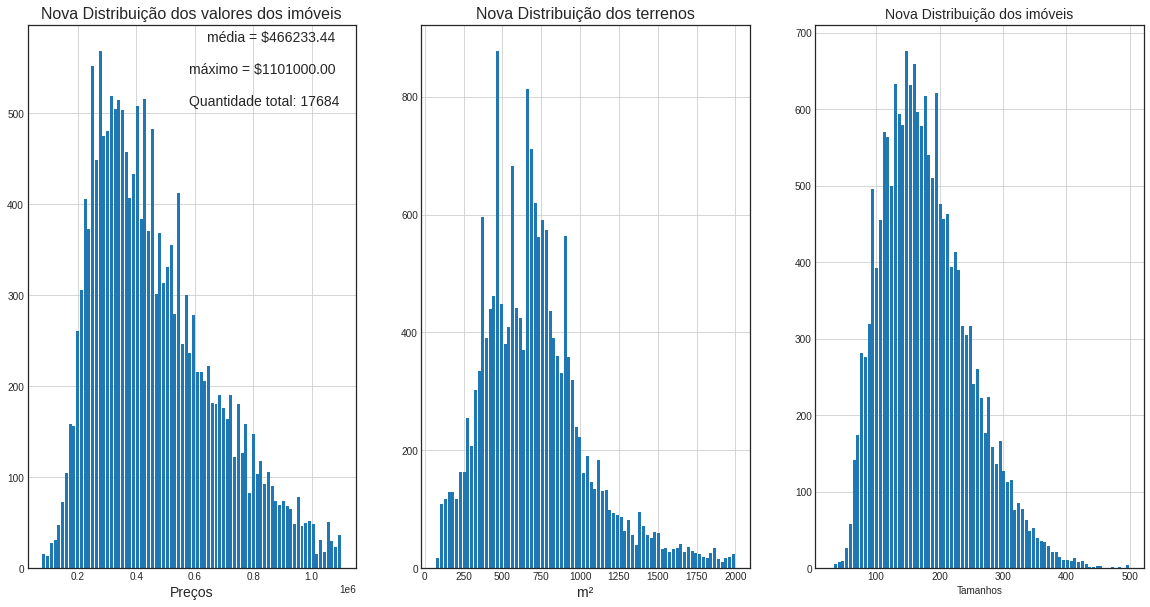

In [94]:
plt.style.use('seaborn-white')
plt.figure(figsize=(20,10))


plt.subplot(1,3,1)
text = f'média = ${houses["price"].mean():.2f} \n\nmáximo = ${max(houses["price"]):.2f} \n\nQuantidade total: {houses.shape[0]}'
ax = plt.gca()
plt.text(0.95, 0.99,  text, horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=14)
plt.hist(houses['price'], rwidth=0.8, bins=80)
plt.title('Nova Distribuição dos valores dos imóveis', fontsize=16)
plt.xlabel('Preços', fontsize=14)
plt.grid(True)

plt.subplot(1,3,2)
plt.hist(houses['sqft_lot'], rwidth=0.8, bins=80)
plt.title('Nova Distribuição dos terrenos', fontsize=16)
plt.xlabel('m²', fontsize=14)
plt.grid(True)

plt.subplot(1,3,3)
plt.hist(houses['sqft_living'], rwidth=0.8, bins=80)
plt.title('Nova Distribuição dos imóveis', fontsize=14)
plt.xlabel('Tamanhos')
plt.grid(True)

plt.show()

In [95]:
# Definimos a variável alvo e a isolamos.
target = houses['price']
datas = houses.drop(columns='price')

# Definimos as variáveis de treino e teste
x_train, x_test, y_train, y_test = train_test_split(datas, target, random_state=42, shuffle=True)

# Criamos o modelo e fazemos o treinamento
model_LR = LinearRegression()
model_LR.fit(x_train, y_train)

# Visualizamos os coeficientes gerados.
for column, coef in zip(datas.columns, model_LR.coef_):
  print(f'{column}: {coef}')

bedrooms: -8529.337750072673
bathrooms: 22913.712886150843
sqft_living: 557.708465952941
sqft_lot: -20.17490824228074
floors: 10589.890537106277
waterfront: 174368.63934848973
view: 28879.481550158165
condition: 31081.19155934355
grade: 74743.25988209526
sqft_above: 336.2134140192281
sqft_basement: 221.49505192868867
yr_built: -1834.0612860916444
yr_renovated: 15.450021189797218
lat: 541644.9863983382
long: 23389.348166664055
sqft_living15: 616.8889667325367
sqft_lot15: -43.157502476786846
year: 25592.04211051194
month: 552.1485950579184
day: -209.79180944538672


In [96]:
# Treino de predição
y_pred_train = model_LR.predict(x_train)

# Predição
y_pred = model_LR.predict(x_test)

###Metricas

In [97]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2 Score:', r2_score(y_test, y_pred))

MAE: 86439.69957982842
RMSE: 114845.86717644584
R2 Score: 0.6929798028987209


In [98]:
# Teste de Predição
model_LR.predict([[3,2,167.22408026755855,418.06020066889636,2,0,0,4,8,69.67670011148273,83.61204013377927,1995,0,47,-122,157.9338535860275,557.4136008918618,2015,12,3]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([184630.90341674])